# WPO 2
[Oefening 1](#oef1)

[Oefening 2](#oef2)
***

In [1]:
import numpy as np # numerical calculations in python
from scipy.optimize import fmin, fsolve
from scipy.misc import derivative
import matplotlib.pyplot as plt # package for plotting
from matplotlib import rc
rc('text', usetex=True)

# allow to show plots inline
%matplotlib inline 

<a id="oef1"></a> 
## Oefening 1:
Gegeven een normaal verdeelde dataset:
### $f(x_{i}|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{\left(x_{i}-\mu\right)^2}{2\sigma^2}} $
Schat de paramters $\mu$ en $\sigma$ m.b.v. de maximum likelihood methode. Bepaal de onzekerheden op deze geschatte parameters, zowel grafisch als analytisch.

In [2]:
MU = 1.3
SIGMA = 4.5
data = np.random.normal(MU,SIGMA,1000)

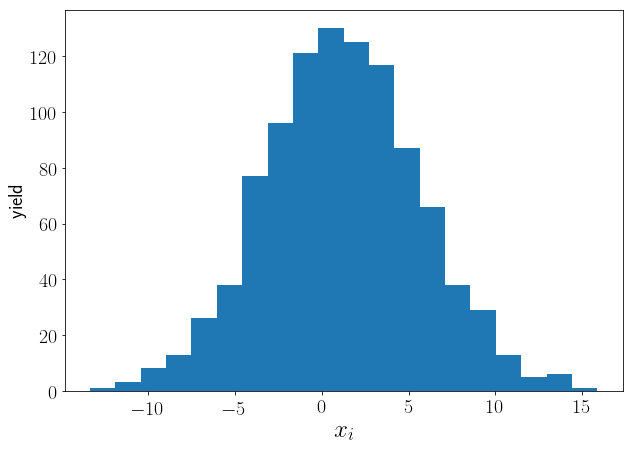

In [3]:
fig = plt.figure(figsize=[10,7]) 
ax = fig.add_subplot(1, 1, 1)
ax.hist(data, 20)
plt.xlabel('$x_{i}$',fontsize=25);
plt.ylabel('yield',fontsize=20);
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

In [4]:
def normalpdf(x,mu,sigma):
    return (1./(sigma*np.sqrt(2*np.pi))) * np.exp( -( (x-mu)**2 / (2*(sigma**2)) )  )

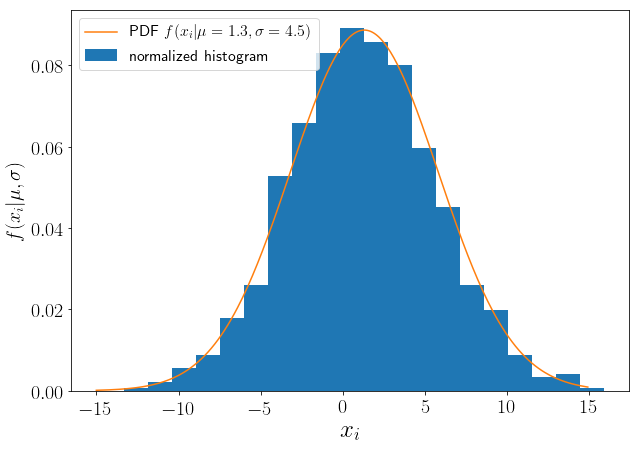

In [5]:
_x = np.arange(-15,15,0.1)
_y = normalpdf(_x,MU,SIGMA)
fig2 = plt.figure(figsize=[10,7]) 
ax2 = fig2.add_subplot(1, 1, 1)
ax2.hist(data, 20,density=True, label="normalized histogram") # density=True will normalize the histogram to 1!
ax2.plot(_x,_y, label="PDF $f(x_{i}|\mu=%.1f, \sigma=%.1f)$"%(MU,SIGMA))
plt.xlabel('$x_{i}$',fontsize=25);
plt.ylabel('$f(x_{i} | \mu, \sigma)$',fontsize=20);
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax2.legend(fontsize=16, loc='upper left')

In [6]:
def LogL(q):
    return -np.sum(np.log(normalpdf(data,q[0],q[1])))
LogL_fun = lambda q: -np.sum(np.log(normalpdf(data,q[0],q[1])))
xopt = fmin(func=LogL_fun, x0=[1.2,4])
mu_ML = xopt[0]
sigma_ML = xopt[1]
print("minimum found at mu = %.2f, sigma = %.2f"%(xopt[0],xopt[1]))

Optimization terminated successfully.
         Current function value: 2914.230547
         Iterations: 28
         Function evaluations: 54
minimum found at mu = 1.19, sigma = 4.46


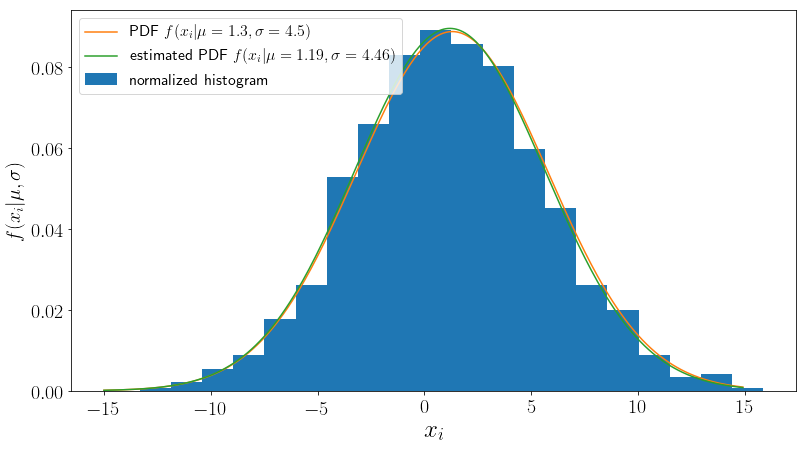

In [7]:
_x = np.arange(-15,15,0.1)
_y = normalpdf(_x,MU,SIGMA)
_y_ML = normalpdf(_x,mu_ML,sigma_ML)
fig3 = plt.figure(figsize=[13,7]) 
ax3 = fig3.add_subplot(1, 1, 1)
ax3.hist(data, 20,density=True, label="normalized histogram") # density=True will normalize the histogram to 1!
ax3.plot(_x,_y, label="PDF $f(x_{i}|\mu=%.1f, \sigma=%.1f)$"%(MU,SIGMA))
ax3.plot(_x,_y_ML, label="estimated PDF $f(x_{i}|\mu=%.2f, \sigma=%.2f)$"%(mu_ML,sigma_ML))
plt.xlabel('$x_{i}$',fontsize=25);
plt.ylabel('$f(x_{i} | \mu, \sigma)$',fontsize=20);
for tick in ax3.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax3.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax3.legend(fontsize=16, loc='upper left')

### uncertainty using the visual method

####  For the mean

In [8]:
uncMu_fun = lambda k: LogL_fun([k,sigma_ML]) - LogL_fun([mu_ML,sigma_ML]) - (1./2.)
mulow = mu_ML - 0.5
mulow = fsolve(uncMu_fun, mulow)[0]
muhigh = mu_ML + 0.5
muhigh = fsolve(uncMu_fun, muhigh)[0]
unc_mu_vis=(muhigh-mulow)/2.
print("The uncertainty on mu is found to be: %.3f"%(unc_mu_vis))

The uncertainty on mu is found to be: 0.141


#### For the standard deviation

In [9]:
uncSigma_fun = lambda l: LogL_fun([mu_ML,l]) - LogL_fun([mu_ML,sigma_ML]) - (1./2.)
sigmalow = sigma_ML - 0.5
sigmalow = fsolve(uncSigma_fun, sigmalow)[0]
sigmahigh = sigma_ML + 0.5
sigmahigh = fsolve(uncSigma_fun, sigmahigh)[0]
unc_sigma_vis = (sigmahigh-sigmalow)/2.
print("The uncertainty on sigma is found to be: %.3f"%(unc_sigma_vis))

The uncertainty on sigma is found to be: 0.100


#### Plotting the results

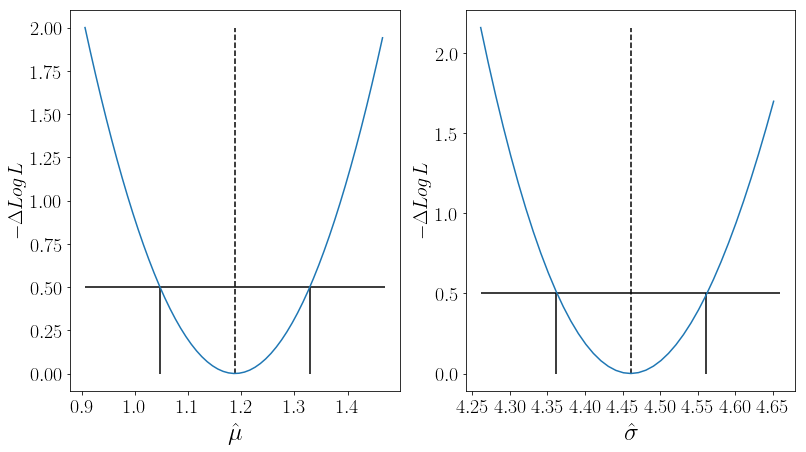

In [10]:
_xmu = np.arange(mu_ML - 2*unc_mu_vis,mu_ML + 2*unc_mu_vis,0.01)
_ymu = np.asarray([uncMu_fun(i)+(1./2.) for i in _xmu])
fig4 = plt.figure(figsize=[13,7]) 

ax4a = fig4.add_subplot(1, 2, 1)
ax4a.plot(_xmu,_ymu)
ax4a.hlines(0.5, mu_ML - 2*unc_mu_vis,mu_ML + 2*unc_mu_vis)
ax4a.vlines(mu_ML - unc_mu_vis,0,0.5)
ax4a.vlines(mu_ML + unc_mu_vis,0,0.5)
ax4a.vlines(mu_ML,0,max(_ymu), linestyles='dashed')
plt.xlabel('$\hat{\mu}$',fontsize=25);
plt.ylabel('$-\Delta LogL$',fontsize=20);
for tick in ax4a.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax4a.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

_xsigma = np.arange(sigma_ML - 2*unc_sigma_vis,sigma_ML + 2*unc_sigma_vis,0.01)
_ysigma = np.asarray([uncSigma_fun(i)+(1./2.) for i in _xsigma])
ax4b = fig4.add_subplot(1,2, 2)
ax4b.plot(_xsigma,_ysigma)
ax4b.hlines(0.5, sigma_ML - 2*unc_sigma_vis,sigma_ML + 2*unc_sigma_vis)
ax4b.vlines(sigma_ML - unc_sigma_vis,0,0.5)
ax4b.vlines(sigma_ML + unc_sigma_vis,0,0.5)
ax4b.vlines(sigma_ML,0,max(_ysigma), linestyles='dashed')
plt.xlabel('$\hat{\sigma}$',fontsize=25);
plt.ylabel('$-\Delta LogL$',fontsize=20);
for tick in ax4b.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax4b.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)


### Uncertainty with the analytical method

In [11]:
def partial_second_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(args)
    return derivative(wraps, point[var], dx = 1e-6, n=2)

unc_mu = 1./np.sqrt(partial_second_derivative(LogL,0,[mu_ML,sigma_ML]))
unc_sigma = 1./np.sqrt(partial_second_derivative(LogL,1,[mu_ML,sigma_ML]))
print("The uncertainty on mu is found to be: %.3f"%unc_mu)
print("The uncertainty on sigma is found to be: %.3f"%unc_sigma)

The uncertainty on mu is found to be: 0.141
The uncertainty on sigma is found to be: 0.100


<a id="oef2"></a> 
## Oefening 2:
Gegeven dezelfde normaal verdeelde dataset als in de vorige oefening:
### $f(x_{i}|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{\left(x_{i}-\mu\right)^2}{2\sigma^2}} $
Schat de paramters $\mu$ en $\sigma$ m.b.v. de kleinste kwadraten methode. Bepaal de onzekerheden (grafisch) op deze geschatte parameters

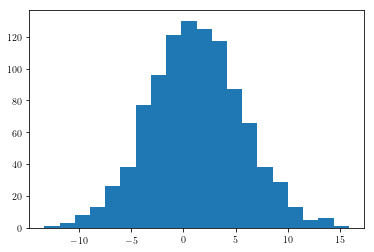

In [35]:
nbins = 20
bincontent, binedges, patches = plt.hist(data, nbins);
binsize = np.abs(binedges[1] - binedges[0])
bincenters = np.asarray([i-binsize/2. for i in binedges])
bincenters = bincenters[1:] # the first binedge is the left edge, so it should not be counted here

In [63]:
def chi2(q):
    return np.sum( np.divide(np.power(bincontent-len(data)*binsize*normalpdf(bincenters,q[0],q[1]),2),len(data)*binsize*normalpdf(bincenters,q[0],q[1])) )
chi2_fun = lambda q: np.sum( np.divide(np.power(bincontent-len(data)*binsize*normalpdf(bincenters,q[0],q[1]),2),len(data)*binsize*normalpdf(bincenters,q[0],q[1])) )
xopt_LS = fmin(func=chi2_fun, x0=[1.2,4])
mu_LS = xopt_LS[0]
sigma_LS = xopt_LS[1]
print("minimum found at mu = %.2f, sigma = %.2f"%(xopt_LS[0],xopt_LS[1]))

Optimization terminated successfully.
         Current function value: 8.416470
         Iterations: 29
         Function evaluations: 57
minimum found at mu = 1.21, sigma = 4.53


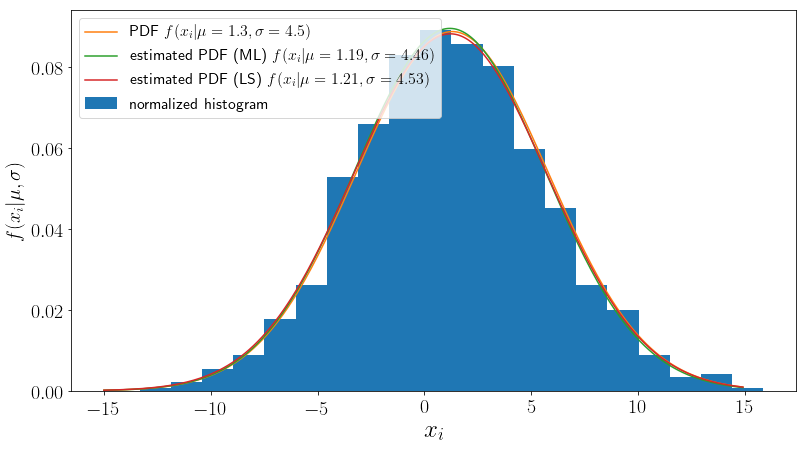

In [64]:
_x = np.arange(-15,15,0.1)
_y = normalpdf(_x,MU,SIGMA)
_y_ML = normalpdf(_x,mu_ML,sigma_ML)
_y_LS = normalpdf(_x,mu_LS,sigma_LS)
fig5 = plt.figure(figsize=[13,7]) 
ax5 = fig5.add_subplot(1, 1, 1)
ax5.hist(data, 20,density=True, label="normalized histogram") # density=True will normalize the histogram to 1!
ax5.plot(_x,_y, label="PDF $f(x_{i}|\mu=%.1f, \sigma=%.1f)$"%(MU,SIGMA))
ax5.plot(_x,_y_ML, label="estimated PDF (ML) $f(x_{i}|\mu=%.2f, \sigma=%.2f)$"%(mu_ML,sigma_ML))
ax5.plot(_x,_y_LS, label="estimated PDF (LS) $f(x_{i}|\mu=%.2f, \sigma=%.2f)$"%(mu_LS,sigma_LS))
plt.xlabel('$x_{i}$',fontsize=25);
plt.ylabel('$f(x_{i} | \mu, \sigma)$',fontsize=20);
for tick in ax5.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax5.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax5.legend(fontsize=16, loc='upper left')

### uncertainty using the visual method

####  For the mean

In [1]:
uncMu_fun_LS = lambda k: chi2_fun([k,sigma_LS]) - chi2_fun([mu_LS,sigma_LS]) - (1.)
mulow_LS = mu_LS - 0.5
mulow_LS = fsolve(uncMu_fun_LS, mulow_LS)[0]
muhigh_LS = mu_LS + 0.01
muhigh_LS = fsolve(uncMu_fun_LS, muhigh_LS)[0]
unc_mu_vis_LS=(muhigh_LS-mulow_LS)/2.
print("The uncertainty on mu is found to be: %.3f"%(unc_mu_vis_LS))

NameError: name 'mu_LS' is not defined

#### For the standard deviation

In [66]:
uncSigma_fun_LS = lambda l: chi2_fun([mu_LS,l]) - chi2_fun([mu_LS,sigma_LS]) - (1.)
sigmalow_LS = sigma_LS - 0.5
sigmalow_LS = fsolve(uncSigma_fun_LS, sigmalow_LS)[0]
sigmahigh_LS = sigma_LS + 0.5
sigmahigh_LS = fsolve(uncSigma_fun_LS, sigmahigh_LS)[0]
unc_sigma_vis_LS = (sigmahigh_LS-sigmalow_LS)/2.
print("The uncertainty on sigma is found to be: %.3f"%(unc_sigma_vis_LS))

The uncertainty on sigma is found to be: 0.102


In [67]:
print chi2_fun([mu_LS,sigma_LS])

8.416470207508688


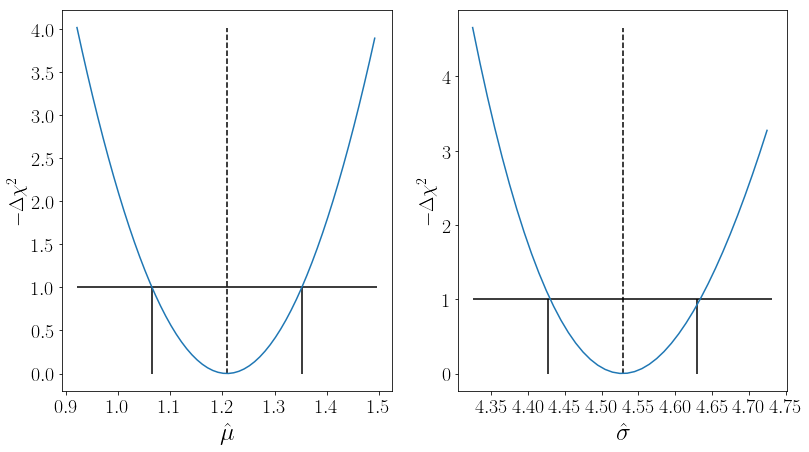

In [68]:
_xmu_LS = np.arange(mu_LS - 2*unc_mu_vis_LS,mu_LS + 2*unc_mu_vis_LS,0.01)
_ymu_LS = np.asarray([uncMu_fun_LS(i)+(1.) for i in _xmu_LS])
fig6 = plt.figure(figsize=[13,7]) 

ax6a = fig6.add_subplot(1, 2, 1)
ax6a.plot(_xmu_LS,_ymu_LS)
ax6a.hlines(1, mu_LS - 2*unc_mu_vis_LS,mu_LS + 2*unc_mu_vis_LS)
ax6a.vlines(mu_LS - unc_mu_vis_LS,0,1)
ax6a.vlines(mu_LS + unc_mu_vis_LS,0,1)
ax6a.vlines(mu_LS,0,max(_ymu_LS), linestyles='dashed')
plt.xlabel('$\hat{\mu}$',fontsize=25);
plt.ylabel('$-\Delta \chi^{2}$',fontsize=20);
for tick in ax6a.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax6a.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

_xsigma_LS = np.arange(sigma_LS - 2*unc_sigma_vis_LS,sigma_LS + 2*unc_sigma_vis_LS,0.01)
_ysigma_LS = np.asarray([uncSigma_fun_LS(i)+(1.) for i in _xsigma_LS])
ax6b = fig6.add_subplot(1,2, 2)
ax6b.plot(_xsigma_LS,_ysigma_LS)
ax6b.hlines(1, sigma_LS - 2*unc_sigma_vis_LS,sigma_LS+ 2*unc_sigma_vis_LS)
ax6b.vlines(sigma_LS - unc_sigma_vis_LS,0,1)
ax6b.vlines(sigma_LS + unc_sigma_vis_LS,0,1)
ax6b.vlines(sigma_LS,0,max(_ysigma_LS), linestyles='dashed')
plt.xlabel('$\hat{\sigma}$',fontsize=25);
plt.ylabel('$-\Delta \chi^{2}$',fontsize=20);
for tick in ax6b.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax6b.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)